Experiment number one: voting risk depends on the number of voters

In [22]:

from src.utils import random_voting, VotingArray
import numpy as np
from src.happiness_level import HappinessLevel
from src.outcomes import all_schemas_outcomes_to_pandas, all_schemas_outcomes, plurality_outcome, borda_outcome, for_two_outcome, veto_outcome
from src.strategic_voting_risk import StrategicVoting
from src.utils import VotingSchemas
import matplotlib.pyplot as plt
from typing import List, Tuple, Callable
from itertools import permutations


ModuleNotFoundError: No module named 'cupy'

In [2]:
from itertools import permutations
from joblib import Parallel, delayed
import numpy as np

class ImprovedStrategicVoting(StrategicVoting):
    def _find_all(self):
        result = self.schema_outcome_f(self.preferences)
        strategic_voting = []

        def compute_strategic_voting(i):
            voter_pref = self.preferences[:, i]
            vwr = np.argwhere(voter_pref == result.winner)[0][0]
            voter_strategic_voting = []

            for p in permutations(voter_pref):
                p = np.array(p)
                if np.argwhere(p == result.winner)[0][0] >= vwr:
                    new_voting = self.preferences.copy()
                    new_voting[:, i] = p
                    new_result = self.schema_outcome_f(new_voting)
                    new_happiness = HappinessLevel(
                        new_voting,
                        new_result.winner,
                        self.happiness.voting_schema,
                    )
                    new_vwr = np.argwhere(new_voting[:, i] == new_result.winner)[0][0]
                    voter_happiness = new_happiness.happiness_level(new_vwr)
                    if voter_happiness > self.happiness.voter[i]:
                        voter_strategic_voting.append(
                            (
                                i,
                                p,
                                new_result,
                                new_happiness.voter[i],
                                self.happiness.voter[i],
                                new_happiness.total,
                                self.happiness.total,
                            )
                        )
            return voter_strategic_voting

        strategic_voting = Parallel(n_jobs=-1, require='sharedmem')(delayed(compute_strategic_voting)(i) for i in range(self.preferences.shape[1]))
        
        for voter_sv in strategic_voting:
            strategic_voting.extend(voter_sv)

        self._as_pandas(strategic_voting)


In [19]:
voters = 100
candidates = 4
min_candidates = 2

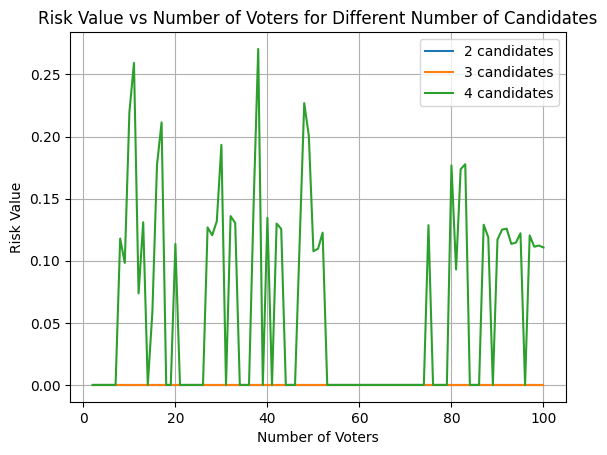

In [21]:
for candidates_current in range(min_candidates, candidates + 1):
    risk_values = np.zeros(voters - 1)  # Initialize array to store risk values
    
    # Generate all random votes for the current number of candidates
    all_random_votes = random_voting(voters, candidates_current)
    
    for num_voters in range(2, voters + 1):
        # Slice the random votes array to get current voting situation
        voting_situation = all_random_votes[:, :num_voters]
        
        # Compute outcomes, happiness, and risk
        outcomes = plurality_outcome(voting_situation)
        happiness = HappinessLevel(voting_situation, outcomes.winner, "PLURALITY").run()
        risk_values[num_voters - 2] = StrategicVoting(voting_situation, happiness, plurality_outcome).run().risk
    
    # Plot risk values depending on the number of voters for each number of candidates
    plt.plot(range(2, voters + 1), risk_values, label=f'{candidates_current} candidates')

plt.xlabel('Number of Voters')
plt.ylabel('Risk Value')
plt.title('Risk Value vs Number of Voters for Different Number of Candidates')
plt.legend()
plt.grid(True)
plt.show()


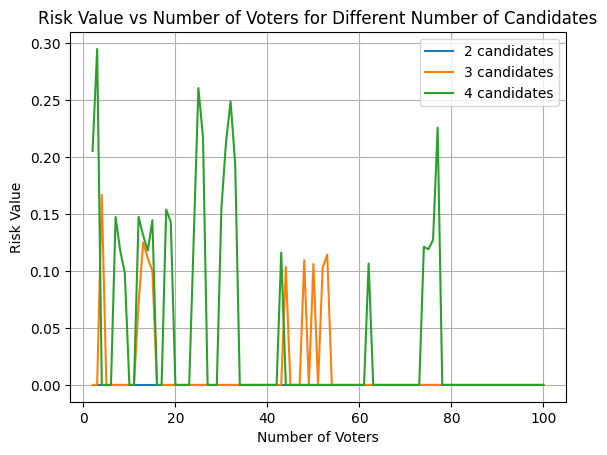

In [17]:

for candidates_current in range(min_candidates, candidates + 1):
    risk_values = []  # List to store risk values for current number of candidates
    
    # Initialize voting situation with appropriate number of rows
    voting_situation = random_voting(2, candidates_current)
    
    for num_voters in range(2, voters + 1):
        # Add one column of random votes for the current number of candidates
        voting_situation = np.column_stack((voting_situation, random_voting(1, candidates_current))).view(VotingArray)
        outcomes = plurality_outcome(voting_situation)
        happiness = HappinessLevel(voting_situation, outcomes.winner, "PLURALITY").run()
        risk = StrategicVoting(voting_situation, happiness, plurality_outcome).run().risk
        risk_values.append(risk) 
    
    # Plot risk values depending on the number of voters for each number of candidates
    plt.plot(range(2, voters + 1), risk_values, label=f'{candidates_current} candidates')

plt.xlabel('Number of Voters')
plt.ylabel('Risk Value')
plt.title('Risk Value vs Number of Voters for Different Number of Candidates')
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 

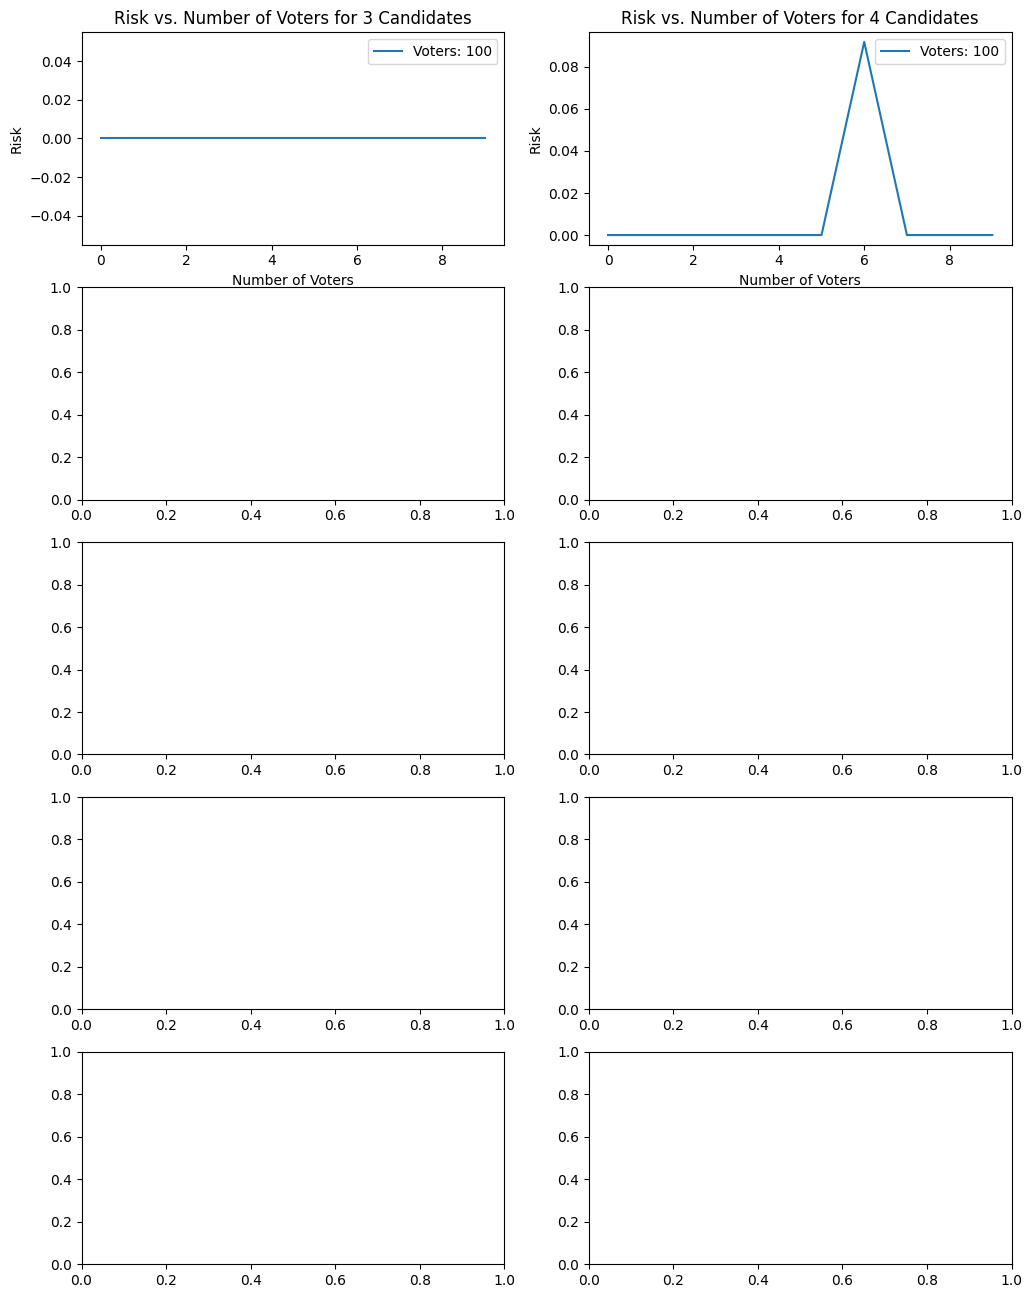

In [5]:
fig, axs = plt.subplots(5, 2, figsize=(12, 16))  # Create subplots grid (5 rows, 2 columns)

for j in range(10):
    row = j // 2  # Calculate row index for subplot grid
    col = j % 2   # Calculate column index for subplot grid
    
    candidates_current = candidates + j  # Update number of candidates for current iteration of j
    risk_values = []  # List to store risk values for current j
    
    for num_voters in range(10):
        voters_current = voters + num_voters  # Update number of voters for current iteration of num_voters
        voting_situation = random_voting(voters_current, candidates_current)
        voting_situation = np.column_stack((voting_situation, random_voting(1, candidates_current))).view(VotingArray)
        
        outcomes = all_schemas_outcomes(voting_situation)
        happiness = HappinessLevel(voting_situation, outcomes[VotingSchemas.VOTING_FOR_TWO.value].winner, "VOTING_FOR_TWO").run()
        risk = StrategicVoting(voting_situation, happiness, for_two_outcome).run().risk
        risk_values.append(risk)  # Store risk value
        
    axs[row, col].plot(range(len(risk_values)), risk_values, label=f'Voters: {voters}')  # Plot risk values against number of voters for current j
    axs[row, col].set_xlabel('Number of Voters')
    axs[row, col].set_ylabel('Risk')
    axs[row, col].set_title(f'Risk vs. Number of Voters for {candidates_current} Candidates')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

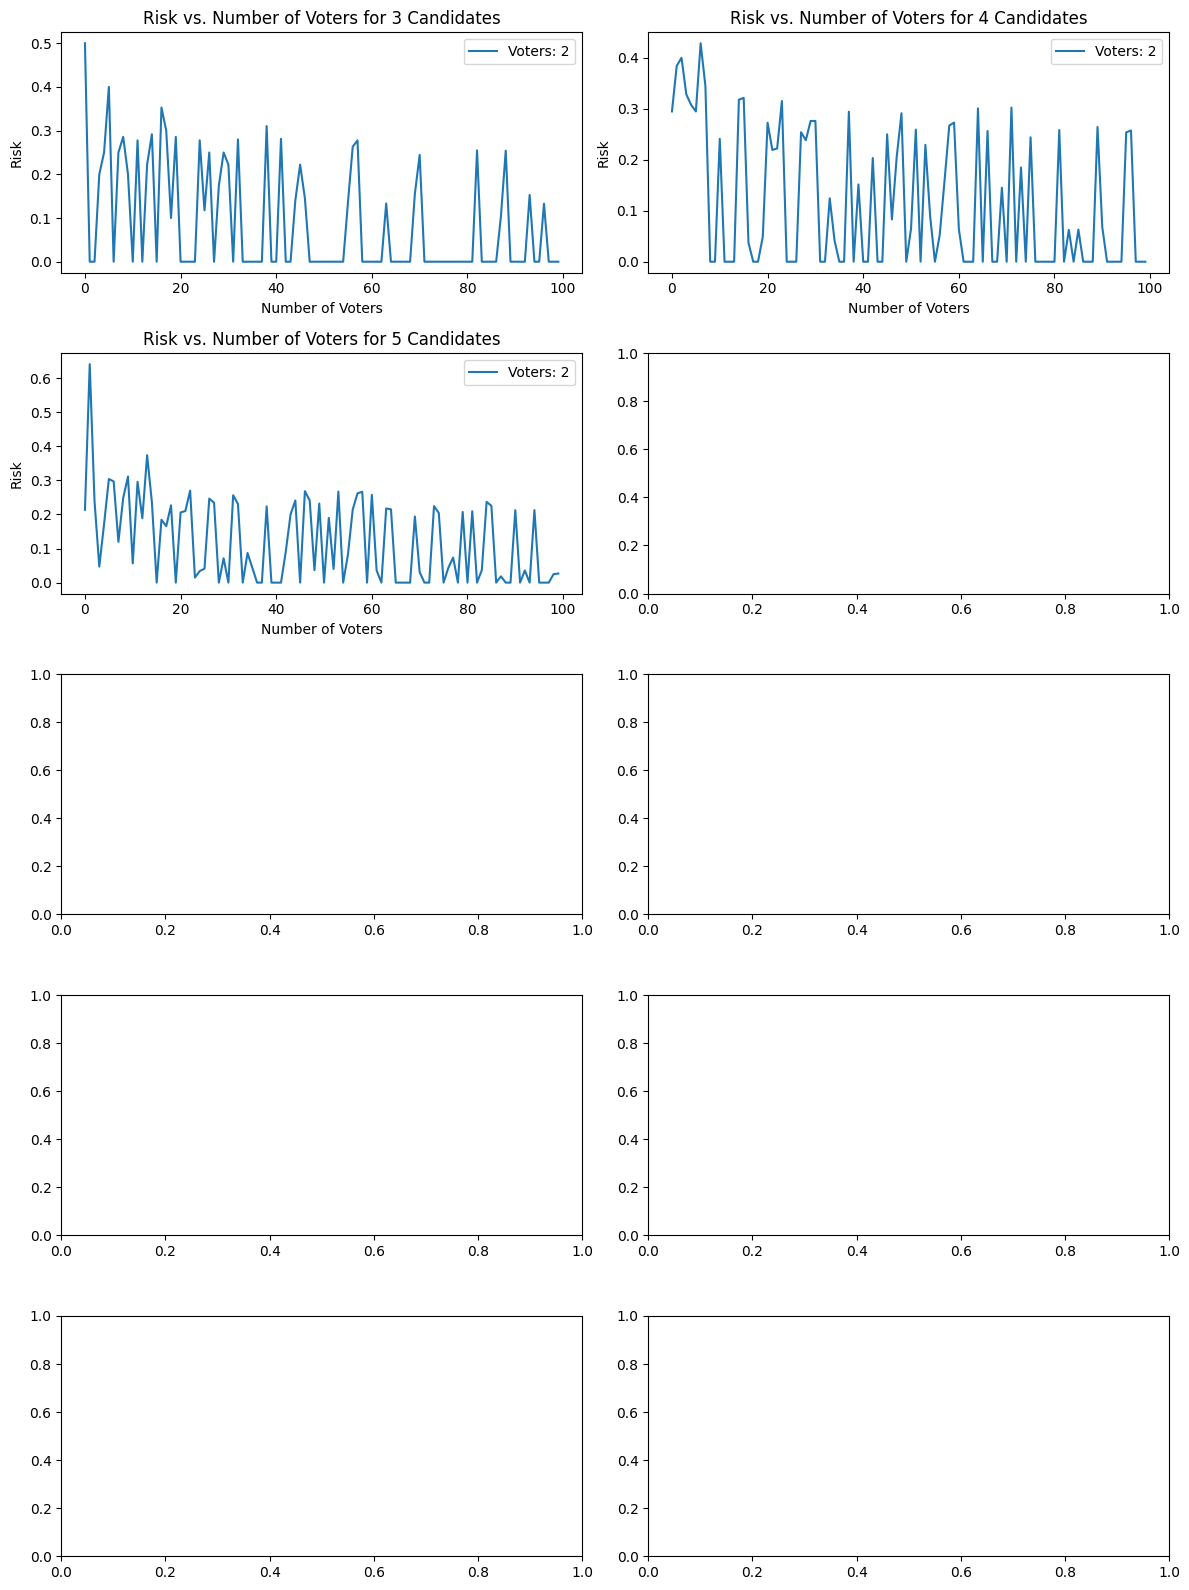

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(12, 16))  # Create subplots grid (5 rows, 2 columns)

for j in range(10):
    row = j // 2  # Calculate row index for subplot grid
    col = j % 2   # Calculate column index for subplot grid
    
    candidates_current = candidates + j  # Update number of candidates for current iteration of j
    risk_values = []  # List to store risk values for current j
    
    for num_voters in range(10):
        voters_current = voters + num_voters  # Update number of voters for current iteration of num_voters
        voting_situation = random_voting(voters_current, candidates_current)
        voting_situation = np.column_stack((voting_situation, random_voting(1, candidates_current))).view(VotingArray)
        
        outcomes = all_schemas_outcomes(voting_situation)
        happiness = HappinessLevel(voting_situation, outcomes[VotingSchemas.VETO_VOTING.value].winner, "VETO_VOTING").run()
        risk = StrategicVoting(voting_situation, happiness, veto_outcome).run().risk
        risk_values.append(risk)  # Store risk value
        
    axs[row, col].plot(range(len(risk_values)), risk_values, label=f'Voters: {voters}')  # Plot risk values against number of voters for current j
    axs[row, col].set_xlabel('Number of Voters')
    axs[row, col].set_ylabel('Risk')
    axs[row, col].set_title(f'Risk vs. Number of Voters for {candidates_current} Candidates')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

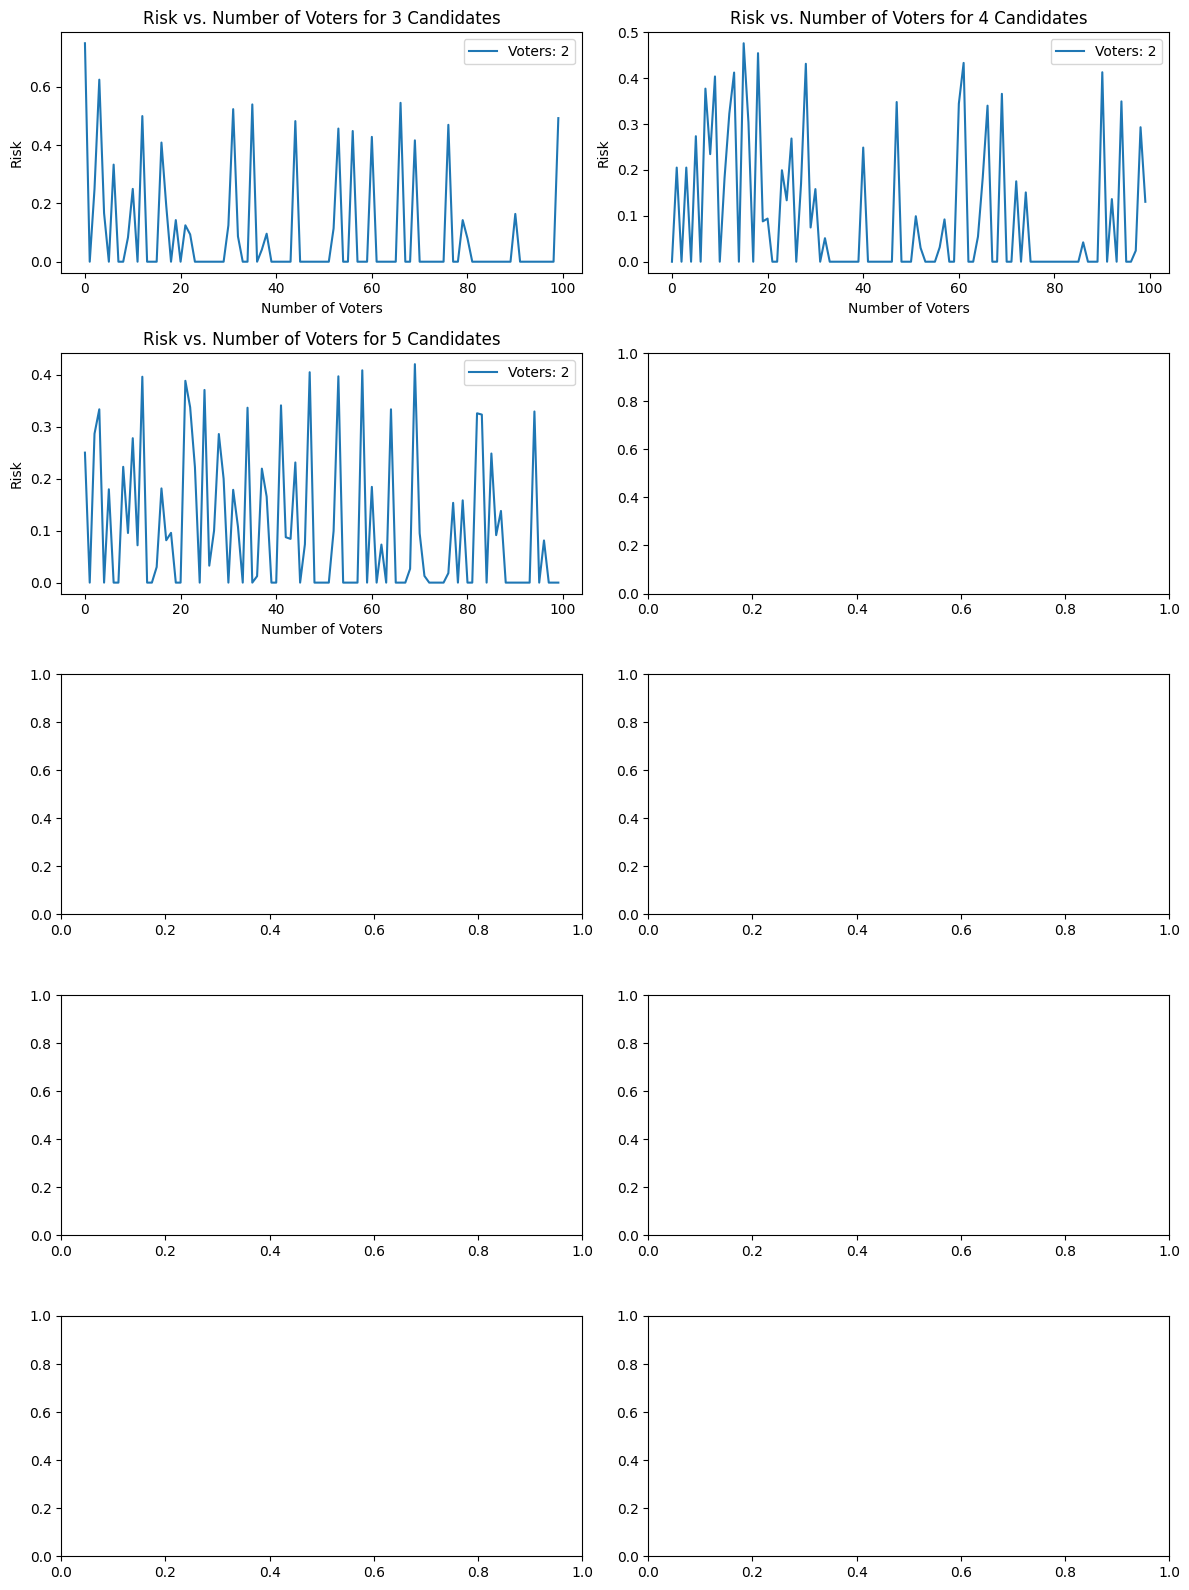

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(12, 16))  # Create subplots grid (5 rows, 2 columns)

for j in range(3):
    row = j // 2  # Calculate row index for subplot grid
    col = j % 2   # Calculate column index for subplot grid
    
    candidates_current = candidates + j  # Update number of candidates for current iteration of j
    risk_values = []  # List to store risk values for current j
    
    for num_voters in range(10):
        voters_current = voters + num_voters  # Update number of voters for current iteration of num_voters
        voting_situation = random_voting(voters_current, candidates_current)
        voting_situation = np.column_stack((voting_situation, random_voting(1, candidates_current))).view(VotingArray)
        
        outcomes = all_schemas_outcomes(voting_situation)
        happiness = HappinessLevel(voting_situation, outcomes[VotingSchemas.BORDA_VOTING.value].winner, "BORDA_VOTING").run()
        risk = StrategicVoting(voting_situation, happiness, borda_outcome).run().risk
        risk_values.append(risk)  # Store risk value
        
    axs[row, col].plot(range(len(risk_values)), risk_values, label=f'Voters: {voters}')  # Plot risk values against number of voters for current j
    axs[row, col].set_xlabel('Number of Voters')
    axs[row, col].set_ylabel('Risk')
    axs[row, col].set_title(f'Risk vs. Number of Voters for {candidates_current} Candidates')
    axs[row, col].legend()

plt.tight_layout()
plt.show()